In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA, ARMA
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('AMZNtrain.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [4]:
df = data[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")

<AxesSubplot:xlabel='Date'>

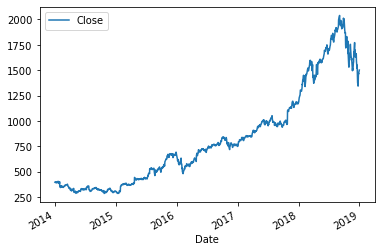

In [5]:
df.plot(style="-")

In [6]:
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q
pdq = list(itertools.product(p, d, q))

In [7]:
warnings.filterwarnings("ignore")
aic= []
parameters = []

for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(df, order=param,
        enforce_stationarity=True, enforce_invertibility=True)
        results = mod.fit()
        # save results in lists
        aic.append(results.aic)
        parameters.append(param)
        #seasonal_param.append(param_seasonal)
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue
# find lowest aic          
index_min = min(range(len(aic)), key=aic.__getitem__)           
 
print('The optimal model is: ARIMA{} -AIC{}'.format(parameters[index_min], aic[index_min]))

ARIMA(0, 0, 0) - AIC:20826.463241759207
ARIMA(0, 0, 1) - AIC:19110.493709147784
ARIMA(0, 0, 2) - AIC:18157.00437235822
ARIMA(0, 1, 0) - AIC:10967.25715260332
ARIMA(0, 1, 1) - AIC:10968.362479024392
ARIMA(0, 1, 2) - AIC:10970.361270726997
ARIMA(0, 2, 0) - AIC:11862.447441972792
ARIMA(0, 2, 1) - AIC:10966.016261328521
ARIMA(0, 2, 2) - AIC:10967.00462063812
ARIMA(1, 0, 0) - AIC:10986.0824267876
ARIMA(1, 0, 1) - AIC:10987.091668247676
ARIMA(1, 0, 2) - AIC:10989.0901246968
ARIMA(1, 1, 0) - AIC:10968.360372685094
ARIMA(1, 1, 1) - AIC:10970.328827715028
ARIMA(1, 1, 2) - AIC:10966.25088101505
ARIMA(1, 2, 0) - AIC:11478.744305815504
ARIMA(1, 2, 1) - AIC:10966.983638839782
ARIMA(1, 2, 2) - AIC:10964.688747942508
ARIMA(2, 0, 0) - AIC:10987.088928247813
ARIMA(2, 0, 1) - AIC:10984.687945332917
ARIMA(2, 0, 2) - AIC:10984.988108946349
ARIMA(2, 1, 0) - AIC:10970.355880445855
ARIMA(2, 1, 1) - AIC:10972.357026971522
ARIMA(2, 1, 2) - AIC:10967.178667580818
ARIMA(2, 2, 0) - AIC:11345.650883084287
ARIMA(2,

In [8]:
model = ARIMA(df, order=parameters[index_min])
model_fit = model.fit(disp=0) 
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 1256
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -5480.260
Method:                       css-mle   S.D. of innovations             18.944
Date:                Mon, 26 Apr 2021   AIC                          10970.520
Time:                        11:04:48   BIC                          10996.199
Sample:                             2   HQIC                         10980.172
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0010      0.001      0.667      0.505      -0.002       0.004
ar.L1.D2.Close    -0.1970      1.060     -0.186      0.853      -2.275       1.881
ma.L1.D2.Close    -0.8310      1.066

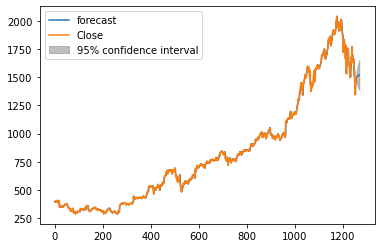

In [16]:
model_fit.plot_predict(start=2, end=len(df)+12)
plt.plot(figsize=(15,6))
plt.show()